<a href="https://colab.research.google.com/github/oleksandragolub/progetto-architettura-dati-with-ml/blob/main/duplicates_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Architettura Dati**
---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — A.A 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706)

---
---



## **Esperimento: Duplicates Features**
---
---


### **Librerie e strumenti per il preprocessing e la modellazione in ML**



Queste righe di codice importano le librerie necessarie per il preprocessing dei dati, la gestione dei dataset e la loro visualizzazione, oltre a strumenti per il bilanciamento dei dati, l'implementazione di modelli di machine learning e la gestione dei flussi tramite una pipeline:
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- **matplotlib.ticker (mtick)** permette di personalizzare la formattazione degli assi nei grafici, ad esempio per mostrare percentuali.
- il modulo **scipy.stats** fornisce funzioni per calcoli statistici avanzati. In particolare calcola l'intervallo di confidenza per una distribuzione t di Student.
- **IPython.display.display** permette di visualizzare oggetti (come DataFrame o grafici) direttamente nei notebook, utile per un output più leggibile.
- **copy** fornisce strumenti per creare copie indipendenti di oggetti complessi, utile per evitare modifiche non volute durante l’elaborazione dei dati.
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **MinMaxScaler** trasforma i dati normalizzandoli in un intervallo specifico, tipicamente tra 0 e 1. Utile quando le feature hanno scale diverse.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).
- **SimpleImputer** sostituisce i valori mancanti con una strategia semplice (es. media, mediana, valore più frequente).
- **PCA** (analisi delle componenti principali) è una tecnica di riduzione della dimensionalità che trasforma le feature di un dataset in nuove variabili (componenti principali), preservando la massima varianza possibile.
- **Axes3D** è un modulo di **Matplotlib** che permette di creare grafici tridimensionali. Viene spesso usato con PCA per rappresentare i dati in uno spazio ridotto a 3 dimensioni.
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).

Strumenti per la gestione della cross-validation e l'ottimizzazione del modello:
- **KFold** divide il dataset in k sottoinsiemi (fold) per valutare le performance del modello in modo più robusto.
- **StratifiedKFold** è un variante di KFold che mantiene la stessa distribuzione delle classi in ogni fold, utile per dataset sbilanciati.
- **cross_val_score** esegue la cross-validation e restituisce i punteggi delle metriche scelte per ogni fold.
- **cross_validate** permette di valutare più metriche contemporaneamente durante la cross-validation.
- **GridSearchCV** esegue una ricerca esaustiva dei migliori iperparametri testando tutte le combinazioni specificate.
- **RandomizedSearchCV** simile a GridSearchCV, ma esplora casualmente solo alcune combinazioni, rendendolo più veloce.
- **uniform, randint, loguniform** da **scipy.stats** definiscono distribuzioni casuali per la ricerca degli iperparametri in **RandomizedSearchCV**.
- **make_scorer** consente di creare metriche personalizzate per la valutazione del modello.
- **Patch** viene usato per personalizzare le legende nei grafici.
- **cm (colormap)** è la libreria di **matplotlib** per gestire le mappe di colori nei grafici.

Modelli di Machine Learning:
- **DecisionTreeClassifier** implementa un albero di decisione, un modello che suddivide i dati in base a domande sequenziali per fare previsioni.
- **plot_tree** è una funzione che permette di visualizzare la struttura dell'albero di decisione addestrato. È utile per interpretare il modello, capire quali feature sono state utilizzate per le suddivisioni e come il modello prende le decisioni.
- **LogisticRegression** è un modello statistico di classificazione binaria basato sulla funzione logistica (sigmoide). Stima la probabilità che un'osservazione appartenga a una classe specifica.
- **SVC (Support Vector Classifier)** è un potente modello per la classificazione. Trova un iperpiano ottimale che separa le classi massimizzando la distanza tra loro. Può utilizzare diversi kernel (lineare, polinomiale, RBF, ecc).
- **GaussianNB (Naive Bayes Gaussiano)** è basato sul **Teorema di Bayes**, assume che le feature siano indipendenti tra loro. La variante GaussianNB è utilizzata quando le feature seguono una distribuzione normale (gaussiana). È molto veloce e adatto a dataset di grandi dimensioni.
- **RandomForestClassifier** è un modello ensemble che combina più alberi di decisione per migliorare l'accuratezza e ridurre l'overfitting. Ogni albero riceve un sottoinsieme casuale dei dati (bagging) e fa una previsione. Il risultato finale è dato dalla maggioranza delle previsioni degli alberi. È molto potente, flessibile e meno sensibile ai dati rumorosi.
- **MLPClassifier** implementa una rete neurale feedforward (Multilayer Perceptron), utile per catturare relazioni complesse nei dati.

Metriche di valutazione dei modelli:
- **accuracy_score(y_true, y_pred)** serve per calcolare l'accuratezza, ossia la percentuale di previsioni corrette.
- **precision_score(y_true, y_pred)** serve per indicare la percentuale di predizioni corrette tra quelle che il modello ha classificato come positive. Utile per problemi con classi sbilanciate.
- **recall_score(y_true, y_pred)** serve per misurare quanti dei veri positivi il modello è riuscito a identificare.
- **f1_score(y_true, y_pred)** serve per ottenere la media armonica tra precisione e recall. Utile quando è importante trovare un bilanciamento tra precisione e recall.
- **confusion_matrix(y_true, y_pred)** serve per creare una matrice di confusione, che mostra il numero di predizioni corrette e errate suddivise per classe. Utile per analizzare dove il modello sta sbagliando.
- **roc_auc_score** calcola direttamente l’AUC (Area Under the ROC Curve), utile per confrontare modelli di classificazione binaria.
- **roc_curve(y_true, y_score)** misura la capacità di un modello di classificazione binaria nel distinguere tra classi positive e negative. Mostra la relazione tra il True Positive Rate (TPR) e il False Positive Rate (FPR) a diversi livelli di soglia.
- **auc(fpr, tpr)** è una metrica (Area Under Curve) che misura l'area sotto la curva ROC (Receiver Operating Characteristic). Un valore di AUC=1 indica un classificatore perfetto, mentre AUC=0.5 indica un classificatore casuale. Da notare che L'AUC è particolarmente utile quando si confrontano diversi modelli: più è alto, migliore è la capacità predittiva del modello.
- **pearsonr** calcola il coefficiente di correlazione di Pearson tra due variabili, utile per analizzare la relazione lineare tra feature.

Strumenti per l'uso di pipeline e gestione dei flussi:
- **Pipeline (da sklearn.pipeline)** consente di concatenare più passaggi (preprocessing + modello) in un’unica struttura ordinata e riutilizzabile.
- **ImbPipeline (da imblearn.pipeline)** è una versione della pipeline che supporta correttamente le operazioni di bilanciamento come SMOTE al suo interno.




In [1]:
import kagglehub
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform, pearsonr

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, make_scorer
from matplotlib.patches import Patch
from matplotlib import cm
from sklearn.metrics import roc_auc_score

import matplotlib.ticker as mtick  # necessario per formattare gli assi
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from IPython.display import display
import copy

---
---
### **Dataset**


Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [2]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

# Use the path returned by kagglehub.dataset_download instead of a hardcoded path
# dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

Il dataset è stato scaricato in: /kaggle/input/diabetes-dataset-using-many-medical-metrics
['diabetes (1).csv']


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **Casting delle colonne e/o target**


È essenziale verificare e, se necessario, effettuare il cast dei tipi delle feature e del target. Questo passaggio garantisce che i dati vengano interpretati correttamente durante le analisi, evitando errori dovuti a una rappresentazione errata o incoerente dei tipi di dati disponibili.

*   `df.dtypes` determina se una colonna contiene numeri interi (int64), numeri decimali (float64), stringhe (object), valori booleani (bool), o categorie (category).
*   `dtype: object` significa che l'elenco dei tipi di dato è memorizzato come un oggetto generico in Pandas.

In [5]:
# Tipi di dato per capire se servono cast
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Da notare che la colonna `Outcome` deve essere castata a `category`, perché rappresenta una variabile categorica (classi 0 e 1).

Per il resto delle colonne non è necessario alcun cast. Le variabili sono già correttamente rappresentate come float64 per valori continui o int64 per valori discreti.

In [6]:
# Cast della colonna Outcome a category
df['Outcome'] = df['Outcome'].astype('category')

# Verifica dei tipi aggiornati
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,category


#### **Controllo iniziale del dataset**


Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [7]:
df.shape

(768, 9)

* `df.isnull().sum()` è un comando che consente di verificare la presenza di valori mancanti (nulli) in ogni colonna di un DataFrame.

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Siccome non è necessario eliminare i valori nulli, procediamo con:

* `df.duplicated()` è un comando che permette di identificare il numero di righe duplicate all'interno di un DataFrame.

In [9]:
df.duplicated().sum()

np.int64(0)

Siccome non è necessario eliminare i valori duplicati, procediamo con:
*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un DataFrame Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: category(1), float64(2), int64(6)`,  indica che nel dataset ci sono 1 colonna con tipo categorico, 2 colonne con tipo float64 (numeri decimali) e 6 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 49.0 KB di memoria.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


#### **Descrizione del dataset**


Il dataset analizza le caratteristiche cliniche di pazienti per la classificazione binaria della presenza o assenza di diabete. Ogni riga rappresenta un paziente, mentre le colonne contengono misurazioni mediche e dati anamnestici.

##### **Feature del dataset**
Le variabili disponibili nel dataset includono misurazioni fisiologiche, anamnestiche e indici metabolici, espressi come valori numerici continui o interi:

- Pregnancies: numero di gravidanze della paziente (solo per donne, nei dati non è specificato il sesso).
- Glucose (mg/dL): livello di glucosio nel sangue a digiuno.
- BloodPressure (mmHg): pressione arteriosa diastolica.
- SkinThickness (mm): spessore della pelle del tricipite, indicativo del grasso corporeo sottocutaneo.
- Insulin (µU/mL): livello di insulina nel sangue.
- BMI (kg/m²): indice di massa corporea, utile per valutare il peso corporeo rispetto all'altezza.
- DiabetesPedigreeFunction: funzione che stima la probabilità di sviluppare diabete in base alla storia familiare (valori più alti indicano una maggiore predisposizione genetica).
- Age (anni): età del paziente.
- Outcome: variabile target (0 = non diabetico, 1 = diabetico).

##### **Tipologia dei dati**
- Le feature sono numeriche continue e discrete.
- La variabile Outcome è categorica binaria (0/1).

##### **Obiettivo dell’analisi**
L’obiettivo del dataset è costruire un modello di classificazione binaria per predire la presenza di diabete in base ai valori clinici dei pazienti.

#### **Analisi del dataset**


##### **Distribuzione delle classi nel dataset**


L'analisi della distribuzione delle classi nel dataset è essenziale per comprendere eventuali squilibri, perciò procediamo con:

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [11]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

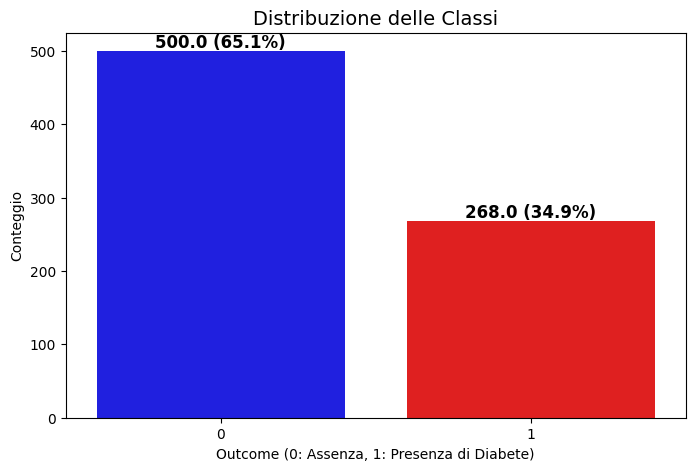

In [12]:
# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df, hue='Outcome', palette=['blue', 'red'], legend=False)

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi
total = len(df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()


Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che **il dataset non è bilanciato**, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.


##### **Dettagli del dataset**


Andando avanti con l'analisi dei dettagli del dataset, possiamo individuare diverse anomalie nei dati, perciò procediamo con:

- `df.describe()` mostra le statistiche principali di ogni feature numerica:
media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
Aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Conclusioni:
- I **valori 0** in Glucose, BloodPressure e BMI sono chiaramente **errori** e vanno sostituiti.
- SkinThickness e Insulin **potrebbero contenere** veri **valori nulli**, ma bisogna verificare più dettagliatamente le colonne.
- Gli altri dati **non mostrano anomalie** evidenti.

Per adesso stabiliamo che i **valori 0** in Glucose, BloodPressure e BMI devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti SENZA diabete**:

In [14]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
df_no_diabetes.describe()

Statistiche per pazienti senza diabete:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


Conclusioni:
- L'insulina media è **anormalmente bassa**:
  - Il **25° percentile e il minimo sono 0**, il che suggerisce **errori nei dati**.
  - In un paziente sano, l'insulina a digiuno **non dovrebbe mai essere zero**!

- Molti valori di SkinThickness sono **pari a 0**:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti sani ha **SkinThickness = 0**.
  - Questo **è anormale**, poiché lo spessore cutaneo **non dovrebbe mai essere esattamente 0** negli individui sani.

- Altri parametri sembrano coerenti:
  - Glucose indica la media di 109.98, nella norma per non diabetici.
  - BloodPressure indica la media di 68.19, valore realistico.
  - BMI indica la media di 30.30, leggermente sopra la norma (sovrappeso).
  - Age indica la media di 31.19, con un intervallo tra 21 e 81 anni.

Questo significa che **i valori 0** di Insulin e SkinThickness **degli individui sani** devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti CON diabete**:

In [15]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
df_diabetes.describe()


Statistiche per pazienti con diabete:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


Conclusioni:
- Molti valori di Insulin sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° e 50° percentile sono 0**, il che significa che **almeno il 50%** dei pazienti diabetici ha **Insulin = 0**.
  - Questo **è anomalo**, perché nei pazienti diabetici (soprattutto quelli **con diabete di tipo 2**) i livelli di insulina sono generalmente **più alti** a causa dell'insulino-resistenza.
  - Tuttavia, se **la maggior parte dei dati** proviene da pazienti con **diabete di tipo 1**, allora è plausibile, poiché in questi soggetti il pancreas **non produce insulina** o ne **produce quantità minime**.

- Molti valori di SkinThickness sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti diabetici ha **SkinThickness = 0**.
  - Questo è **potenzialmente un errore** nei dati, perché lo spessore cutaneo **non dovrebbe essere esattamente 0**.
  - Tuttavia, **è possibile** che alcuni pazienti diabetici abbiano effettivamente **un livello di grasso sottocutaneo molto basso**, soprattutto se **soffrono di distrofia lipoatrofica** o **perdita di massa grassa dovuta a diabete scarsamente controllato**.

- Altri parametri sembrano coerenti.

Dunque, scegliemo di **non gestire** i casi di **Insulin = 0** e **SkinThickness = 0** per gli **individui diabetici**.


##### **Statistiche del dataset**


Le statistiche di skewness (asimmetria) e kurtosis (curtosi) ci dicono quali variabili hanno una distribuzione non normale e necessitano di trasformazioni nella fase di preprocessing per migliorare la qualità del modello.

Procediamo con l'analisi della Skewness (Asimmetria):

- `skew()` indica quanto la distribuzione è sbilanciata a destra o a sinistra:
  - **Skewness > 0** significa la distribuzione sbilanciata **a destra** (coda più lunga a destra).
  - **Skewness < 0** significa la distribuzione sbilanciata **a sinistra** (coda più lunga a sinistra).

In [16]:
# Selezioniamo solo le colonne numeriche (escludendo 'Outcome')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calcoliamo la skewness per le feature numeriche
print("Skewness (Asimmetria):")
df[numeric_columns].skew()

Skewness (Asimmetria):


,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597


Conclusioni:
- Pregnancies e Age sono le variabili più **sbilanciate a destra**, quindi potremmo **applicare trasformazioni logaritmiche o sqrt** per renderle più normali.
- Glucose e BMI hanno una **lieve asimmetria**, quindi sono **quasi normali**.
- BloodPressure, SkinThickness e Insulin sono **quasi simmetriche** e **non necessitano di trasformazioni**.


Andando avanti con l'analisi della Kurtosis (Curtosi):
- `.kurtosis()` indica la forma della distribuzione rispetto alla normale:
  - **Kurtosis > 0** indica la distribuzione leptocurtica (più appuntita, più valori concentrati al centro e più code).
  - **Kurtosis < 0** indica la distribuzione platicurtica (più piatta, meno concentrata al centro).

In [17]:
# Calcoliamo la kurtosis per le feature numeriche
print("\nKurtosis (Curtosi):")
df[numeric_columns].kurtosis()


Kurtosis (Curtosi):


,0
Pregnancies,0.159220
Glucose,0.640780
BloodPressure,5.180157
SkinThickness,-0.520072
Insulin,7.214260
BMI,3.290443
DiabetesPedigreeFunction,5.594954
Age,0.643159


Conclusioni:
- BloodPressure, BMI e Age sono più leptocurtiche (più **concentrate al centro** con code più pronunciate).
- Insulin e DiabetesPedigreeFunction sono molto platicurtiche (distribuzione **molto sparsa e appiattita**).
- SkinThickness e Glucose sono **leggermente** platicurtiche, ma **non in modo estremo**.



Cosa fare nel preprocessing:
- lavorare con le variabili con skewness elevata (fortemente asimmetriche), applicando una trasformazione:
  - Insulin (Skewness = 2.272, Kurtosis = 7.214)
  - DiabetesPedigreeFunction (Skewness = 1.919, Kurtosis = 5.594)

- lavorare con le variabili con kurtosis elevata (leptocurtiche) per controllare e trattare eventuali outlier:
  - BloodPressure (Kurtosis = 5.180) ha code molto lunghe, potrebbe contenere outlier.
  - BMI (Kurtosis = 3.290) ha tendenza leptocurtica, potrebbe contenere outlier.
  - Age (Kurtosis = 0.643) è leggermente leptocurtica, perciò non è necessaria una trasformazione, ma si può normalizzare.

---
---

#### **Preprocessing iniziale**

Obiettivo:

- Sostituire i valori 0 (non validi) con NaN solo dove ha senso;

- Rimuovere eventualmente outlier non fisiologici estremi;



In [18]:
# Colonne che NON possono mai essere 0: Glucose, BloodPressure, BMI
columns_to_fix_all = ['Glucose', 'BloodPressure', 'BMI']
df[columns_to_fix_all] = df[columns_to_fix_all].replace(0, np.nan)

# Colonne che impostiamo a NaN SOLO per pazienti sani
df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].replace(0, np.nan)
df.loc[df['Outcome'] == 0, 'SkinThickness'] = df.loc[df['Outcome'] == 0, 'SkinThickness'].replace(0, np.nan)

Verificiamo dei NaN creati:

In [19]:
print("Valori mancanti dopo la sostituzione degli zeri:")
print(df.isnull().sum())

Valori mancanti dopo la sostituzione degli zeri:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               139
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Dopo aver identificato valori mancanti veri (che derivano da zeri clinicamente impossibili), si controllano eventuali outliner assurdi:

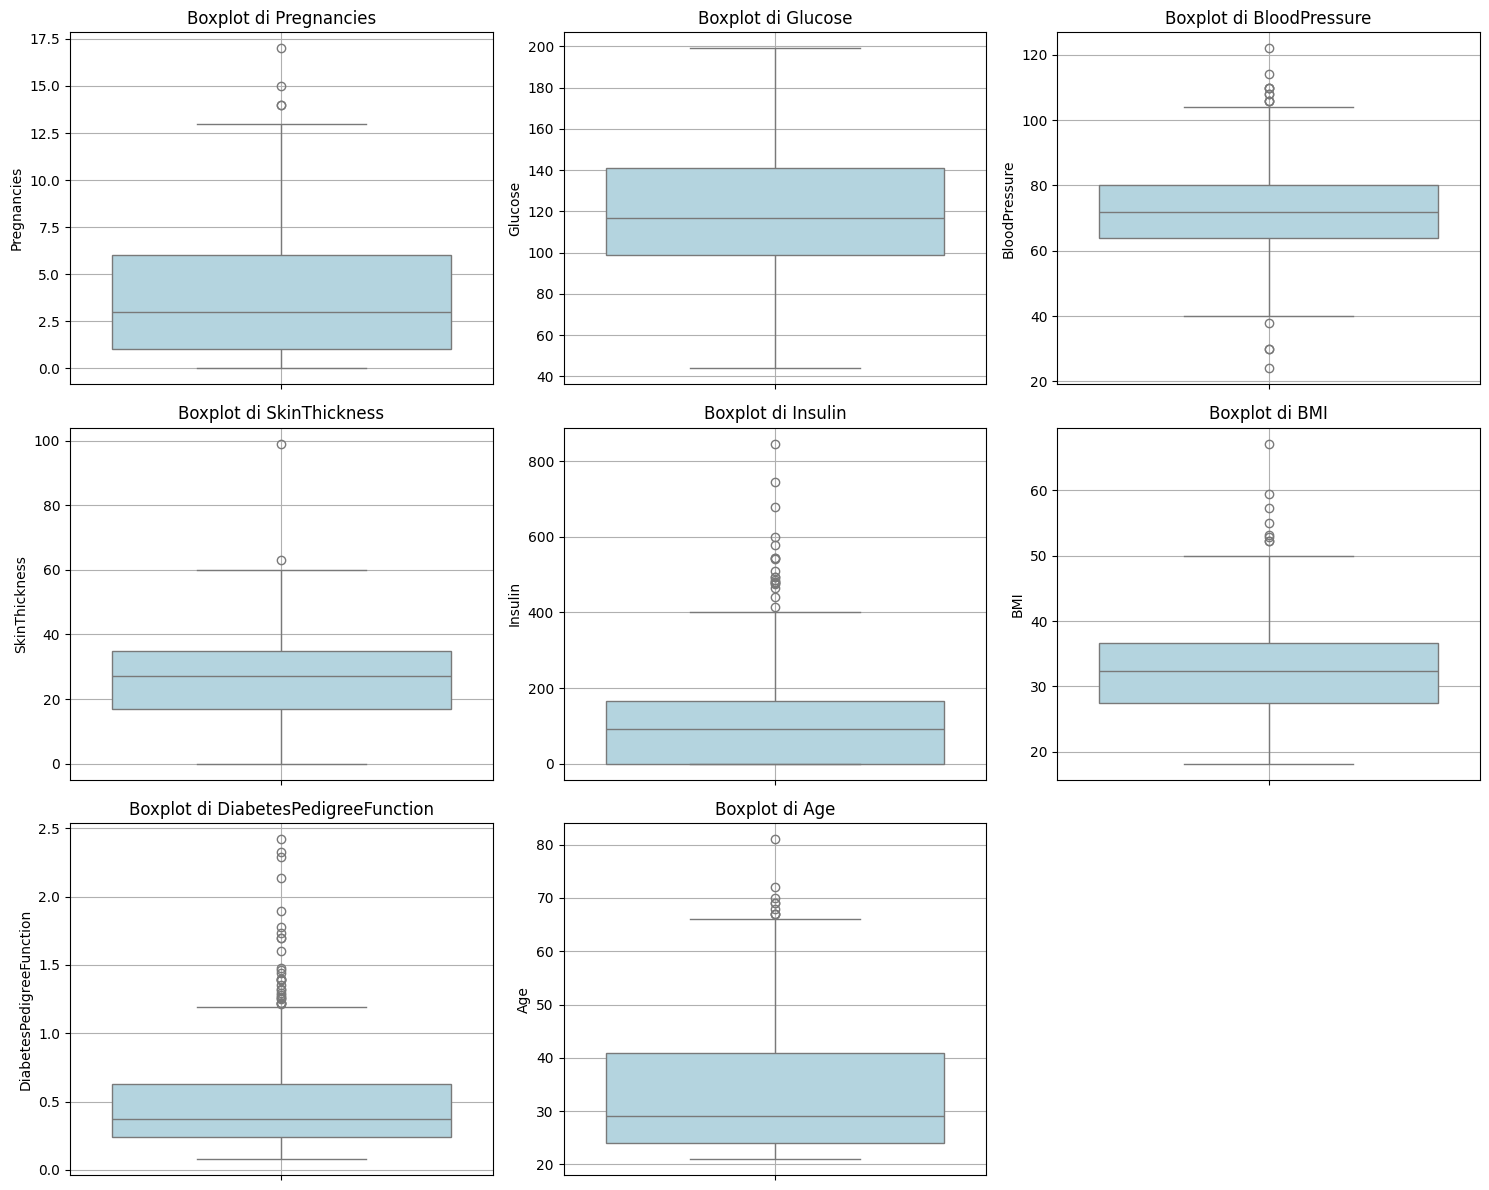

In [20]:
# Seleziona tutte le colonne numeriche (esclude 'Outcome' se è category)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Layout automatico per subplot
n = len(numeric_cols)
rows = (n + 2) // 3  # max 3 colonne per riga
cols = 3

plt.figure(figsize=(5 * cols, 4 * rows))  # Adatta la dimensione

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Conclusioni:
- Pregnancies:
  - Valori > 13 sono rari, ma clinicamente possibili nel caso di gravidanze multiple.

- Glucose:
  - Range da ~45 a ~200 è fisiologico.

- BloodPressure:
  - Valori < 30 sono dubbi, ma non impossibili.
  - Valori alti (fino a 122) sono plausibili in ipertensione.

- SkinThickness:
  - Il valore più alto è 99 ed è plausibile in persone obese, anche se raro.

- Insulin:
  - Outlier > 600 (fino a 850) possono causare varianza elevata, perciò meglio gestirli.

- BMI:
  - Outlier > 60–65: rari, ma possibili in casi di obesità grave.

- Age:
  - Outlier > 70–80 sono perfettamente realistici.

- DiabetesPedigreeFunction:
  - Valori > 2.0 sono plausibili (è un indice astratto).

Dunque, scegliemo di **gestire** il caso di **Insulin** con **Outlier > 600**.


In [21]:
df.loc[df["Insulin"] > 600, "Insulin"] = np.nan

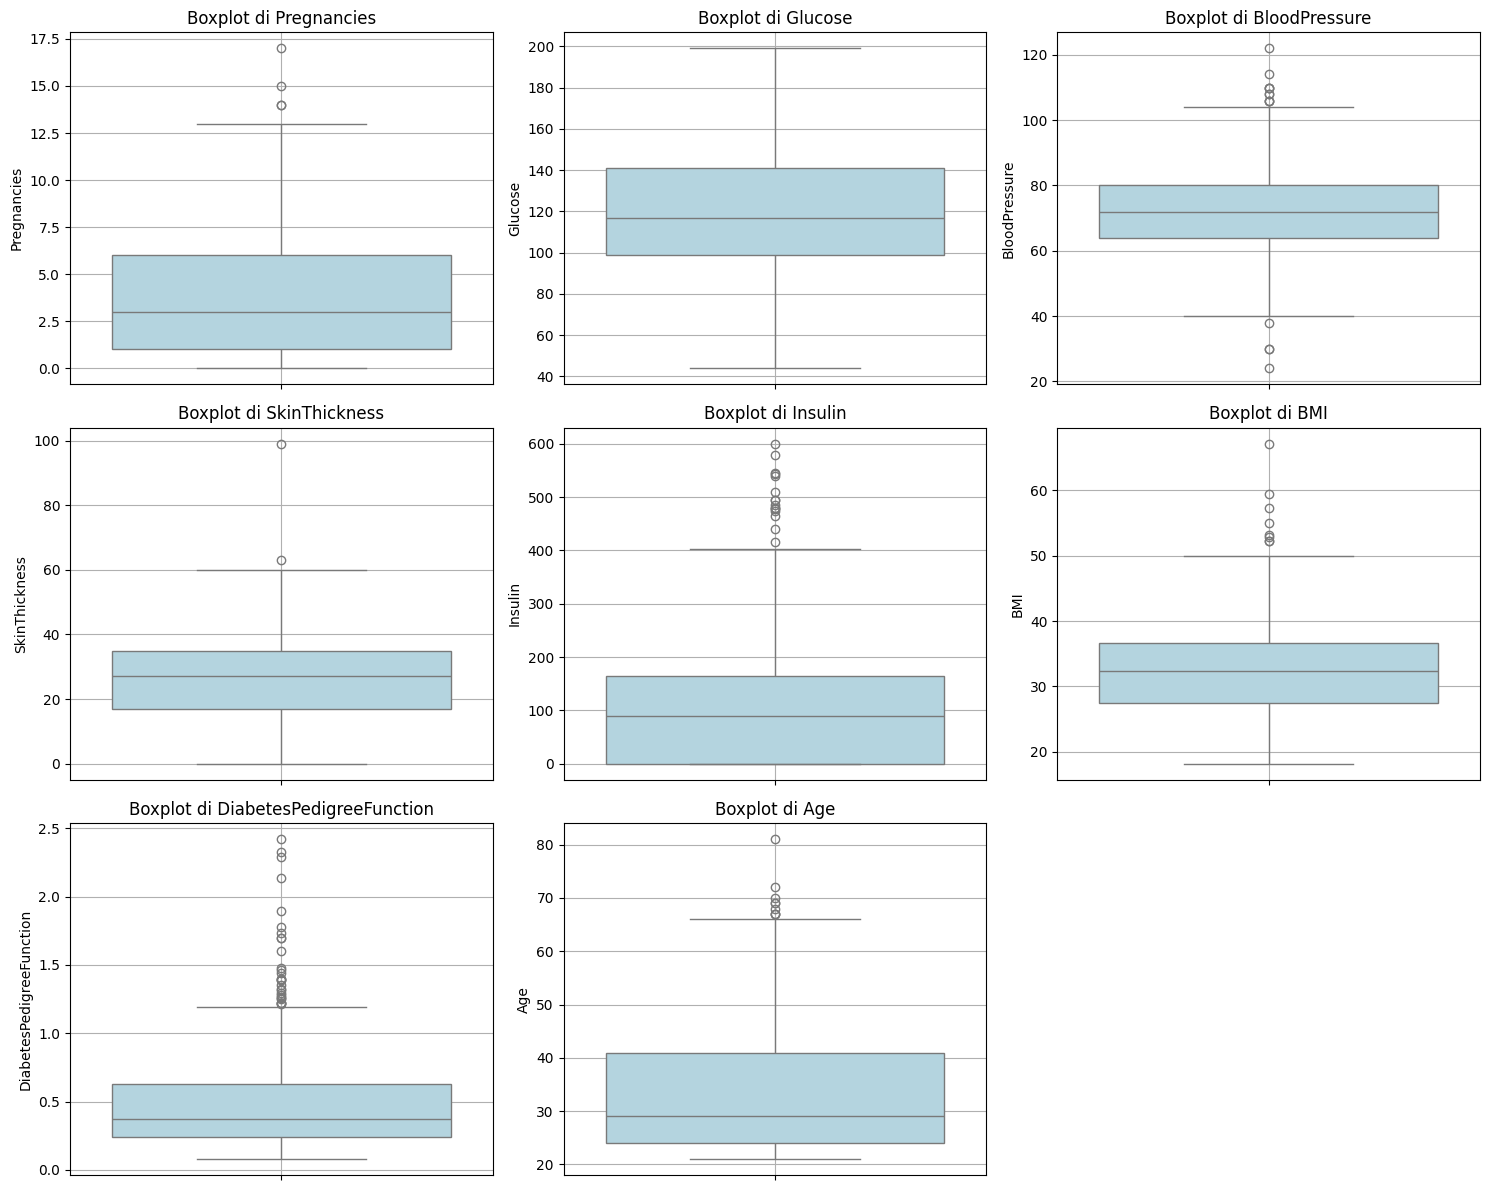

In [22]:
# Seleziona tutte le colonne numeriche (esclude 'Outcome' se è category)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Layout automatico per subplot
n = len(numeric_cols)
rows = (n + 2) // 3  # max 3 colonne per riga
cols = 3

plt.figure(figsize=(5 * cols, 4 * rows))  # Adatta la dimensione

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

#### **Split del dataset**

Dopo aver gestito i valori nulli e gli eventuali outlier, si suddivide il dataset in due blocchi:

- X_train, y_train: 70% dei dati usati per l'addestramento del modello;

- X_temp, y_temp: 30% dei dati, da suddividere ulteriormente in validation e test set (15% ciascuno).

Successivamente, si effettua un secondo split su X_temp, y_temp, ottenendo:

- X_val, y_val: 15% dei dati totali, usati per la validazione del modello;

- X_test, y_test: 15% dei dati totali, usati per il test finale.

In totale:

- Train set = 70%

- Validation set = 15%

- Test set = 15%

In [23]:
# Separazione X e y
X = df.drop("Outcome", axis=1) # tutte le feature
y = df["Outcome"] # la variabile target

# Primo split: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Secondo split: 50% val, 50% test da quel 30% (=> 15% ciascuno)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# 60% train, 20% val, 20% test
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (537, 8)
Validation set: (115, 8)
Test set: (116, 8)


#### **Introduzione di dati duplicati**

Nel contesto di questo esperimento si vuole simulare la ridondanza o duplicazione dei dati nel training set, una condizione che può verificarsi in presenza di errori nei dataset reali, sovracampionamento manuale o raccolta dati non uniforme.

La funzione **introduce_duplicates** prende un DataFrame X con le feature e una Series y con le etichette, e duplica casualmente una percentuale di righe, specificata dal parametro duplication_rate.

Ad esempio, se duplication_rate = 0.1, verrà selezionato casualmente il 10% delle righe di X e y, che verranno aggiunte in coda per generare una nuova versione estesa del dataset.

La selezione è casuale ma riproducibile, grazie al parametro random_state.

**Il risultato** sono due oggetti: **X_augmented** e **y_augmented**, che rappresentano i dati originali con l’aggiunta di righe duplicate, utili per testare la robustezza dei modelli in presenza di dati ridondanti o sbilanciati.

In [24]:
def introduce_duplicates(X, y, duplication_rate=0.1, random_state=42):
    """
    Duplica una percentuale casuale delle righe di X e y.

    Parameters:
    - X: DataFrame delle feature
    - y: Series delle etichette
    - duplication_rate: frazione delle righe da duplicare (es. 0.1 = 10%)
    - random_state: per riproducibilità

    Returns:
    - X_dup, y_dup: nuovi X e y con righe duplicate
    """
    np.random.seed(random_state)

    X_dup = X.copy()
    y_dup = y.copy()

    n_samples = len(X_dup)
    n_duplicates = int(duplication_rate * n_samples)

    # Indici da duplicare
    indices_to_duplicate = np.random.choice(n_samples, size=n_duplicates, replace=True)

    # Crea nuove versioni con duplicati
    X_augmented = pd.concat([X_dup, X_dup.iloc[indices_to_duplicate]], ignore_index=True)
    y_augmented = pd.concat([y_dup, y_dup.iloc[indices_to_duplicate]], ignore_index=True)

    return X_augmented, y_augmented


Il secondo blocco di codice crea sei versioni diverse del training set, ognuna con un diverso livello di duplicazione delle righe:

- Viene definita una lista di livelli di duplicazione (duplication_levels), dal 0% (nessuna duplicazione) fino al 50%.

- Per ciascun livello, si chiama la funzione introduce_duplicates per generare una nuova versione di X_train e y_train, con una certa percentuale di righe duplicate.

- Il risultato è un dizionario duplicated_train_versions, in cui ogni chiave rappresenta il livello di duplicazione (es. "dup_30%") e ogni valore è una tupla (X_dup, y_dup) con quel livello di ridondanza.

Queste versioni verranno poi usate per addestrare e confrontare i modelli, analizzando come la presenza di dati duplicati influenzi le performance e la capacità dei modelli di generalizzare.



In [25]:
duplication_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

duplicated_train_versions = {
    f"dup_{int(d * 100)}%": introduce_duplicates(X_train, y_train, duplication_rate=d, random_state=42)
    for d in duplication_levels
}

#### **Definizione delle pipeline e ricerca iperparametri**

Per ciascun classificatore considerato, è stata definita una pipeline completa utilizzando **ImbPipeline di imblearn**, che consente di includere nella sequenza anche tecniche di bilanciamento dei dati (come SMOTE). Ogni pipeline è composta da:

1. Imputazione avanzata dei valori mancanti (IterativeImputer) che stima i valori mancanti in base alle altre feature.

2. Trasformazioni sui dati:

- StandardScaler normalizza le feature (media 0, dev. std 1);

- PowerTransformer (in SVM e MLP) rende la distribuzione più simile a una normale.

3. Bilanciamento del dataset con SMOTE, per generare esempi sintetici della classe minoritaria.

4. Modello di machine learning (Decision Tree, Random Forest, SVM, MLP).

Per ciascuna pipeline, viene definito anche un **dizionario di iperparametri** (param_dist_...) da utilizzare in fase di tuning.

Di seguito la descrizione per ogni modello:

- pipeline_dt: Decision Tree
  - Si tratta del modello base ad albero decisionale.

  - Iperparametri principali:

    - max_depth: profondità massima dell’albero.

    - min_samples_split: minimo numero di campioni per dividere un nodo.

    - ccp_alpha: potatura post-pruning per evitare overfitting.

- pipeline_rf: Random Forest
  - Si tratta del modello ensemble di alberi, più robusto e preciso.

  - Iperparametri principali:

    - n_estimators: numero di alberi nella foresta.

    - max_depth, min_samples_split: come per l’albero decisionale.

    - max_features: numero di feature considerate a ogni split.

- pipeline_svm: Support Vector Machine
  - Si tratta del classificatore potente, particolarmente efficace con feature ben scalate.

  - Include PowerTransformer per migliorare la distribuzione delle variabili.

  - Iperparametri principali:

    - C: regolarizzazione del margine.

    - kernel: tipo di funzione kernel (lineare o RBF).

    - gamma: coefficiente del kernel RBF.

- pipeline_mlp: Multilayer Perceptron (rete neurale)
  - Si tratta del modello flessibile per apprendere anche relazioni non lineari.

  - Include PowerTransformer e StandardScaler per stabilizzare il training.

  - Iperparametri principali:

    - hidden_layer_sizes: struttura dei layer nascosti.

    - activation: funzione di attivazione.

    - alpha: termine di regolarizzazione L2.

Queste pipeline verranno poi utilizzate con RandomizedSearchCV per trovare la combinazione ottimale di iperparametri, valutando le prestazioni su più livelli di rumore nelle etichette.



In [26]:
pipeline_dt = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

param_dist_dt = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__ccp_alpha': [0.0, 0.001, 0.01]
}


pipeline_rf = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

param_dist_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['sqrt', 'log2']
}


pipeline_svm = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('power', PowerTransformer()),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(random_state=42))
])

param_dist_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

pipeline_mlp = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('power', PowerTransformer()),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', MLPClassifier(random_state=42, max_iter=1000))
])

param_dist_mlp = {
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001, 0.01]
}

#### **Addestramento e valutazione dei modelli**

In questa fase, si esegue l’addestramento, ottimizzazione e valutazione dei modelli su più versioni del dataset di training, ciascuna con un diverso livello di duplicazione delle righe.
L’obiettivo è confrontare la robustezza dei modelli rispetto alla presenza di dati ridondanti, che possono influenzare l’apprendimento e la generalizzazione

Ci sono 4 passi:

1. Organizzazione dei modelli e parametri:

  Tutti i modelli e le rispettive pipeline definite in precedenza (Decision Tree, Random Forest, SVM, MLP) sono organizzati in un dizionario models, assieme al loro dizionario di iperparametri.
  Questo consente di iterare su ciascun modello in modo compatto e modulare.

2. Addestramento iterativo con cross-validation

  Per ciascun livello di duplicazione (0%, 10%, …, 50%), si procede come segue:

  - Si utilizza RandomizedSearchCV per ottimizzare gli iperparametri, testando 10 combinazioni casuali (n_iter=10) per ciascun modello.

  - La cross-validation è basata su StratifiedKFold (5-fold), che mantiene la distribuzione delle classi in ogni suddivisione del training set.

  - L’addestramento avviene su ciascuna versione duplicata di X_train e y_train.

3. Valutazione del modello
  Dopo il fitting, ogni modello viene valutato su due set:

  - Validation set (X_val): per osservare l’accuratezza nel tuning.

  - Test set (X_test): per misurare la performance finale e confrontare tra i modelli.

  Per ogni modello vengono calcolate le seguenti metriche:

  - Accuracy, Precision, Recall, F1-score

  - Matrice di confusione per analizzare errori specifici

  - ROC curve e AUC (Area Under Curve), se disponibile (cioè se il modello fornisce probabilità o decision function)

4. Salvataggio dei risultati

  Tutti i risultati per ogni combinazione modello-livello di duplicazione vengono salvati in una lista di dizionari, poi raccolti in un DataFrame finale results_df, che consente:

  - La comparazione sistematica tra modelli

  - L’analisi dell’effetto della duplicazione sulle metriche

  - La possibilità di effettuare visualizzazioni (curve ROC, heatmap, barplot, ecc.)





In [27]:
# Dizionario modelli e parametri
models = {
    "DecisionTree": (pipeline_dt, param_dist_dt),
    "RandomForest": (pipeline_rf, param_dist_rf),
    "SVM": (pipeline_svm, param_dist_svm),
    "MLP": (pipeline_mlp, param_dist_mlp)
}

# CV con stratificazione
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_results = []

for dup_label, (X_dup, y_dup) in duplicated_train_versions.items():
    print(f"\n Livello di duplicazione: {dup_label}")

    for name, (pipe, params) in models.items():
        print(f"  Modello: {name}")

        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=params,
            n_iter=10,
            scoring='accuracy',
            cv=cv,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )

        search.fit(X_dup, y_dup)

        val_pred = search.predict(X_val)
        test_pred = search.predict(X_test)

        precision = precision_score(y_test, test_pred)
        recall = recall_score(y_test, test_pred)
        f1 = f1_score(y_test, test_pred)
        acc_val = accuracy_score(y_val, val_pred)
        acc_test = accuracy_score(y_test, test_pred)
        conf_matrix = confusion_matrix(y_test, test_pred)

        model_final = search.best_estimator_.named_steps["model"]

        try:
            if hasattr(model_final, "predict_proba"):
                y_score = search.predict_proba(X_test)[:, 1]
            elif hasattr(model_final, "decision_function"):
                y_score = search.decision_function(X_test)
            else:
                y_score = None

            if y_score is not None:
                fpr, tpr, _ = roc_curve(y_test, y_score)
                roc_auc = roc_auc_score(y_test, y_score)
            else:
                fpr, tpr, roc_auc = None, None, None

        except Exception as e:
            print(f"Errore ROC per {name} con {dup_label}: {e}")
            fpr, tpr, roc_auc = None, None, None

        all_results.append({
            "Duplication": dup_label,
            "Model": name,
            "Val_Accuracy": acc_val,
            "Test_Accuracy": acc_test,
            "Precision": precision,
            "Recall": recall,
            "F1_Score": f1,
            "Best_Params": search.best_params_,
            "Confusion_Matrix": conf_matrix,
            "FPR": fpr,
            "TPR": tpr,
            "AUC": roc_auc
        })

# Converti in DataFrame
results_df = pd.DataFrame(all_results)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(results_df)


 Livello di duplicazione: dup_0%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 Livello di duplicazione: dup_10%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP

 Livello di duplicazione: dup_20%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP

 Livello di duplicazione: dup_30%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 Livello di duplicazione: dup_40%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP

 Livello di duplicazione: dup_50%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP
   Duplication         Model  Val_Accuracy  Test_Accuracy  Precision  \
0       dup_0%  DecisionTree      0.773913       0.887931   0.911765   
1       dup_0%  RandomForest      0.800000       0.862069   0.857143   
2       dup_0%           SVM      0.808696       0.896552   0.871795   
3       dup_0%           MLP      0.817391       0.870690   0.842105   
4      dup_10%  DecisionTree      0.773913       0.818966   0.777778   
5      dup_10%  RandomForest      0.791304       0.887931   0.868421   
6      dup_10%           SVM      0.782609       0.853448   0.800000   
7      dup_10%           MLP      0.808696       0.887931   0.833333   
8      dup_20%  DecisionTree      0.773913       0.862069   0.777778   
9      dup_20%  RandomForest      0.800000       0.879


#### **Matrici di correlazione in base al tipo di rumore e al tipo di modello usati**

Questa fase ha l’obiettivo di visualizzare le matrici di confusione per ogni combinazione di modello e livello di duplicazione introdotto nel training set.

Le matrici di confusione forniscono una rappresentazione dettagliata degli errori commessi dai modelli, mostrando:

- Quanti campioni sani sono stati correttamente riconosciuti (veri negativi);

- Quanti sono stati classificati erroneamente come diabetici (falsi positivi);

- E viceversa per i pazienti diabetici.

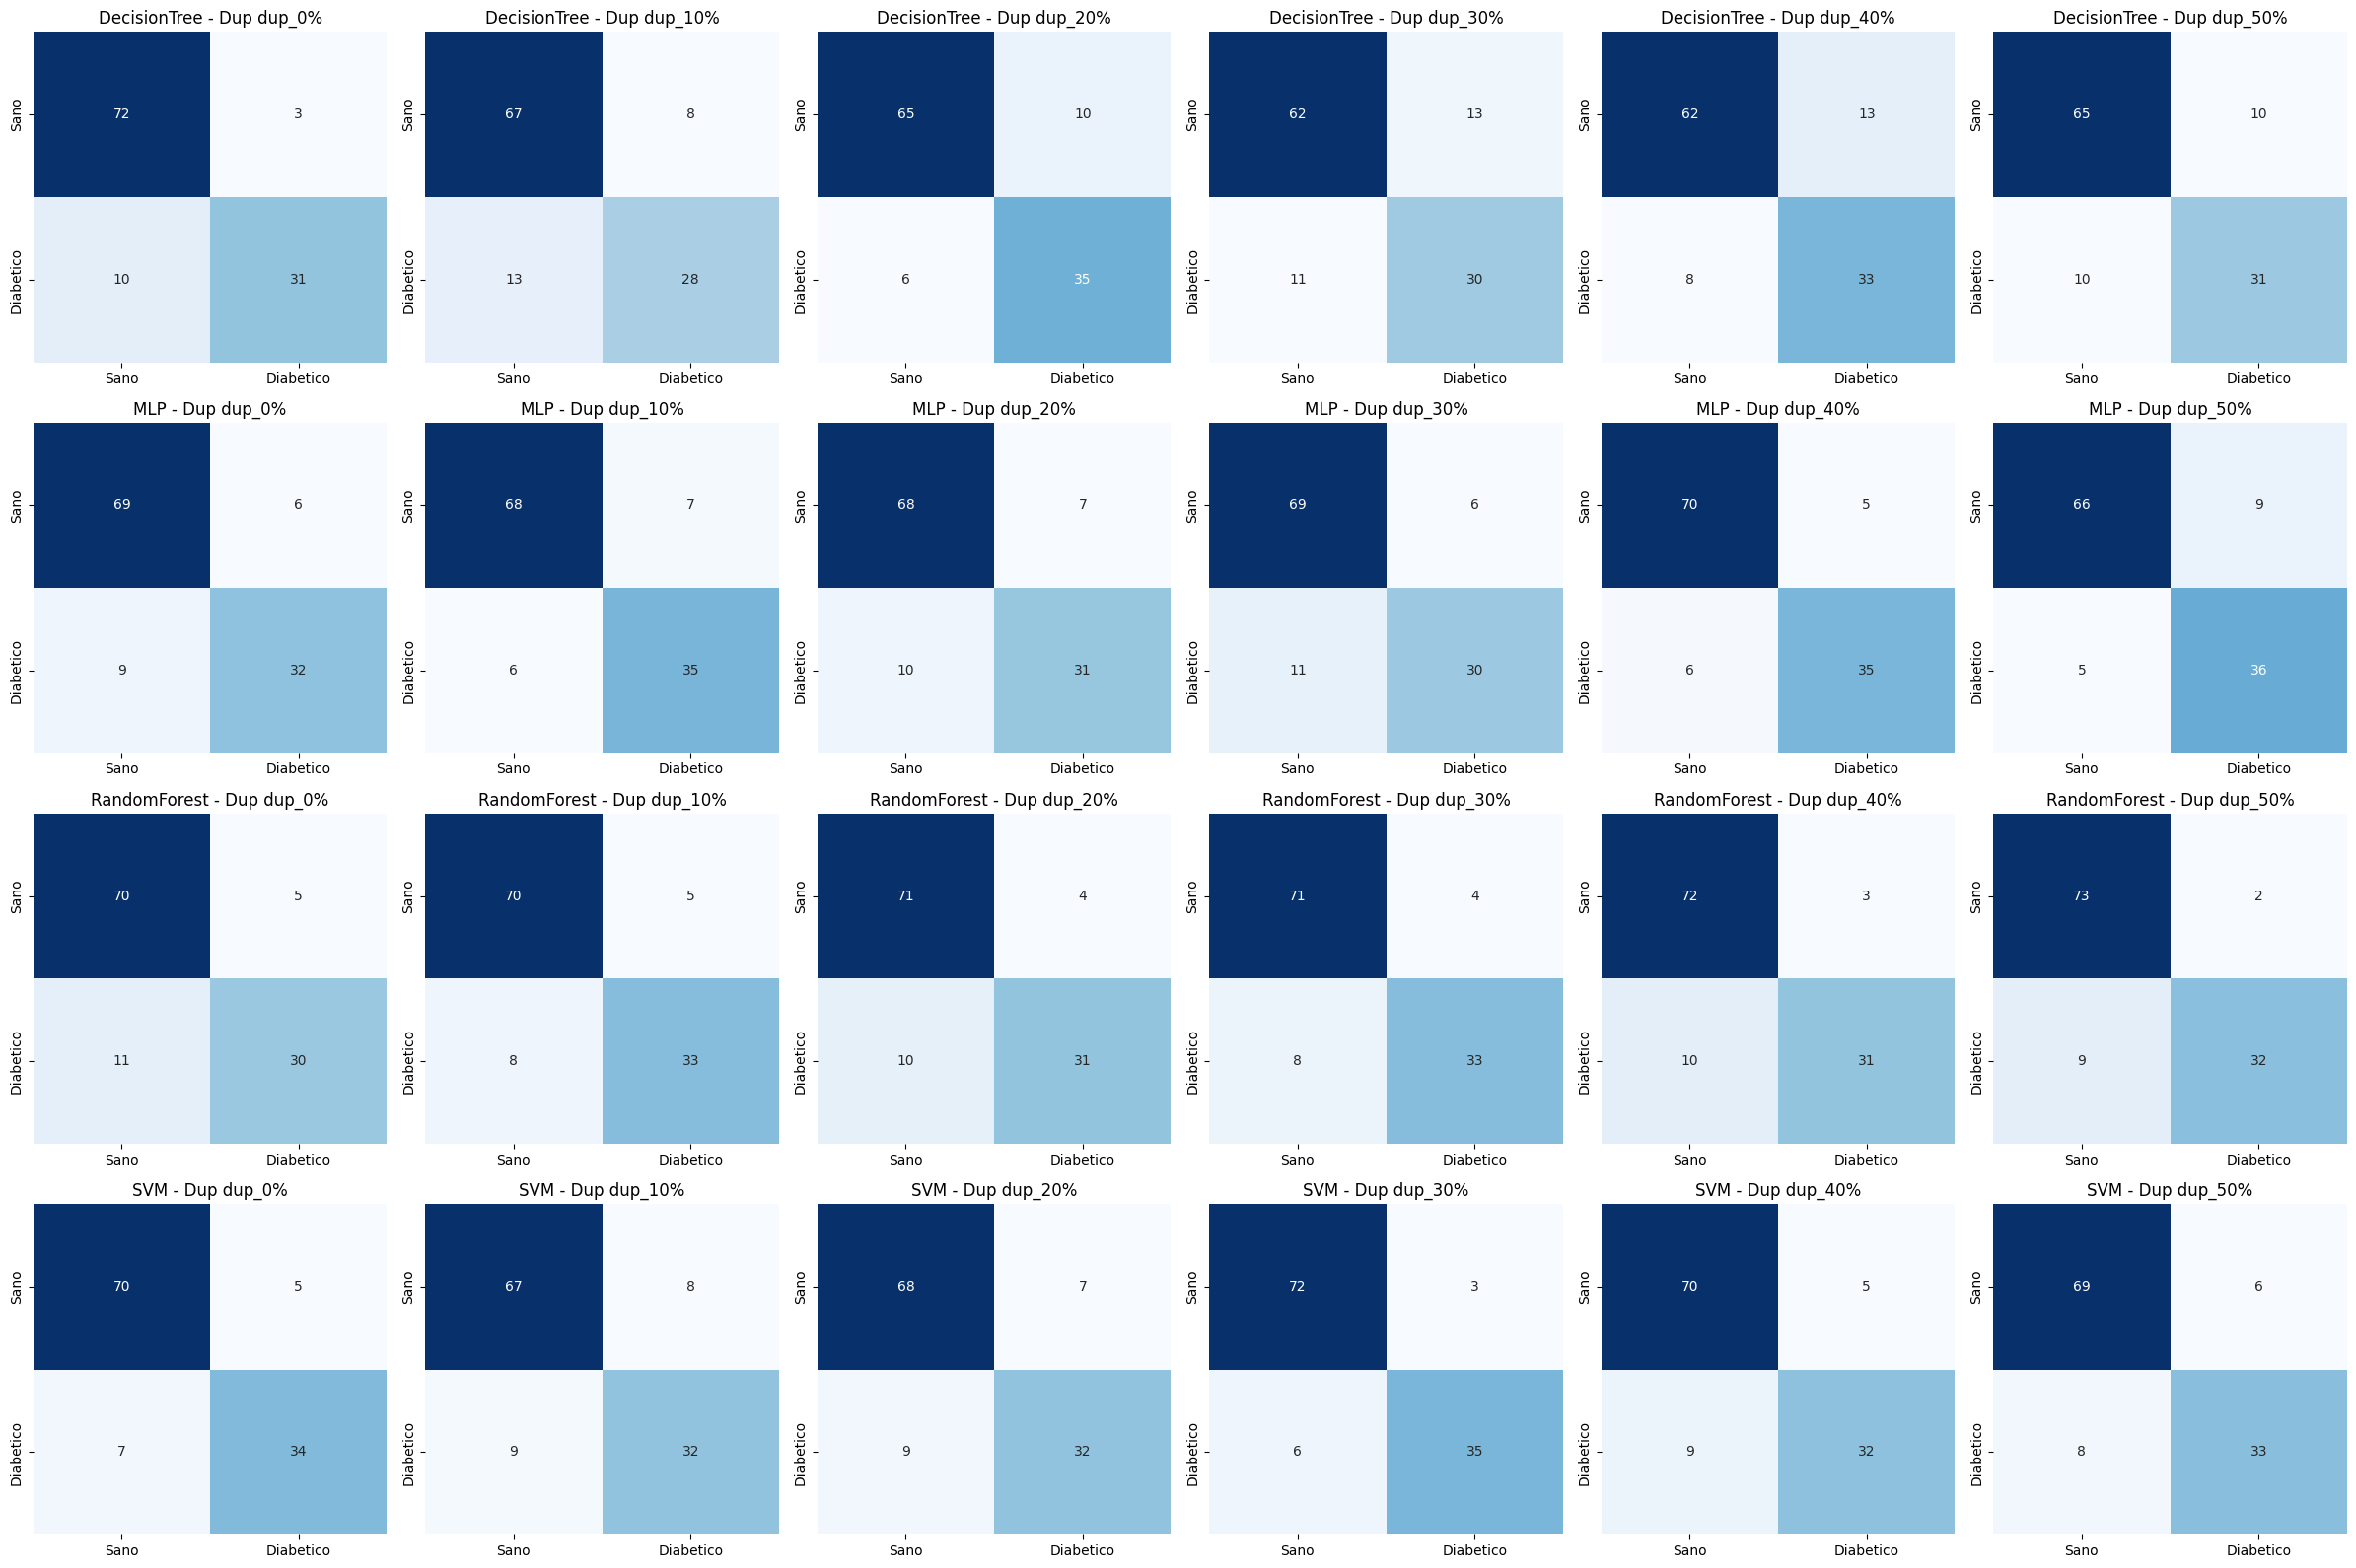

In [29]:
# Aggiungi la colonna booleana che indica se c'è una confusion matrix valida
results_df["has_cm"] = results_df["Confusion_Matrix"].apply(lambda x: isinstance(x, (np.ndarray, list)))

# Filtra solo le righe con confusion matrix valide
valid_df = results_df[results_df["has_cm"] == True]

# Ottieni ordine fisso dei modelli e dei livelli di duplicazione
modeli = sorted(valid_df["Model"].unique())
livelli_dup = sorted(valid_df["Duplication"].unique(), key=lambda x: int(x.split("_")[1][:-1]))

# Crea sottotrame: righe = modelli, colonne = livelli di duplicazione
fig, axes = plt.subplots(len(modeli), len(livelli_dup), figsize=(4*len(livelli_dup), 4*len(modeli)))

for i, model in enumerate(modeli):
    for j, dup in enumerate(livelli_dup):
        ax = axes[i, j] if len(modeli) > 1 else axes[j]

        # Trova la riga corrispondente
        row = valid_df[(valid_df["Model"] == model) & (valid_df["Duplication"] == dup)]

        if not row.empty:
            cm = row.iloc[0]["Confusion_Matrix"]
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                        xticklabels=['Sano', 'Diabetico'],
                        yticklabels=['Sano', 'Diabetico'],
                        ax=ax)
            ax.set_title(f"{model} - Dup {dup}")
            ax.set_xlabel("")
            ax.set_ylabel("")

plt.tight_layout()
plt.show()


Perché è utile?
- Aiuta a individuare schemi di errore specifici per ciascun modello
(es. un modello potrebbe essere sensibile alla duplicazione e aumentare i falsi positivi o i falsi negativi).

- Permette di confrontare visivamente come la presenza di istanze duplicate compromette (o meno) le prestazioni del classificatore.

- Supporta l’analisi qualitativa dei risultati, oltre a quella quantitativa basata su metriche aggregate
(le matrici di confusione mostrano dove il modello sbaglia, non solo quanto sbaglia


### **Analisi dei risultati e visualizzazioni**


Dopo aver raccolto tutte le metriche di valutazione per ciascun modello e ciascun livello di duplicazione delle righe, questa sezione si occupa di analizzare e visualizzare l’effetto della ridondanza nei dati di addestramento sulle prestazioni dei modelli.
L’obiettivo è identificare quali modelli siano più robusti e come la duplicazione influenzi ciascuna metrica, in particolare l'accuratezza sul test set.

Questo blocco del codice:

- Converte l’etichetta testuale del livello di duplicazione (es. "dup_10%") in formato numerico (0.1), salvandola nella colonna Duplication_Float.

- Per ogni modello, calcola la correlazione tra Duplication_Float e Test_Accuracy, ottenendo un valore chiamato EPC (Error-Performance Correlation).

- Il risultato, chiamato EPC, indica quanto la performance del modello decresce all’aumentare del rumore:

  - EPC vicino a -1:  il modello è molto sensibile alla duplicazione: l’accuratezza diminuisce chiaramente all’aumentare dei dati duplicati.

  - EPC vicino a 0: il modello è robusto: la duplicazione ha poco o nessun effetto sulla performance.

  - EPC positivo: la duplicazione sembra migliorare le metriche: può indicare overfitting o adattamento eccessivo ai dati ridondanti.

In [30]:
# Calcola EPC per i livelli di duplicazione
results_df["Duplication_Float"] = results_df["Duplication"].str.extract(r"(\d+)").astype(float) / 100

epc_values = results_df.groupby("Model").agg(
    EPC=("Test_Accuracy", lambda acc: acc.corr(results_df.loc[acc.index, "Duplication_Float"]))
)

# Trasformalo in DataFrame per formattare meglio
epc_df = epc_values.reset_index()
epc_df["EPC"] = epc_df["EPC"].round(3)  # arrotonda a 3 cifre decimali

# Visualizza la tabella
display(epc_df)

,Model,EPC
0,DecisionTree,-0.579
1,MLP,0.251
2,RandomForest,0.838
3,SVM,0.112


Osservazioni su  EPC calcolati:
- Il valore EPC più alto tra tutti (+0.838) dimostra che il Random Forest non solo è stabile al label e feature noise, ma gestisce bene anche ridondanze nei dati.
Questo risultato è coerente con la natura ensemble del modello, che seleziona feature in modo casuale per ogni albero: le feature duplicate non vengono necessariamente selezionate in modo massivo, e l'effetto sul modello finale viene attenuato.

- Decision Tree ha l'EPC negativo (-0.579) che indica un crollo delle performance all’aumentare della duplicazione delle feature.
Il motivo è da ricercarsi nella natura greedy e univariata degli split: la presenza di feature duplicate può portare a scelte ripetitive e ridondanti, che non migliorano il modello ma lo rendono più complesso e fragile.

- MLP ha l'EPC positivo (+0.251) che suggerisce che l’MLP tollera la duplicazione delle feature meglio del rumore nelle etichette.
Le reti neurali tendono ad adattarsi alla ridondanza nei dati, anche se questo può portare a un aumento della complessità e rischio di overfitting.
Tuttavia, la propagazione dell’errore non è grave quanto nel caso di label sbagliate.

- SVM ha l'EPC = +0.112 che indica una buona tolleranza, anche se meno marcata rispetto al feature noise.
Il motivo potrebbe essere che, mentre l’iperpiano non è particolarmente influenzato dalla presenza di feature duplicate, l’efficienza e generalizzazione ne possono risentire se la dimensionalità effettiva cresce senza aggiungere reale informazione.


---
---

Il prosssimo blocco del codice crea per ciascuna metrica (Accuracy, Precision, Recall, F1):

- Lineplot: mostra l’andamento della metrica al variare del livello di duplicazione delle righe nel training set, per ciascun modello.
Ogni punto rappresenta il valore ottenuto su X_test.

- Tabella accanto al grafico: riepiloga i valori numerici della metrica per ciascun modello e ciascun livello di duplicazione.

Da notare: le etichette sull’asse X sono espresse in percentuale di duplicati per migliorare la leggibilità.


Perché è utile:

- Consente di confrontare visivamente l’andamento delle performance tra modelli, in presenza di dati duplicati.

- Permette di identificare quali metriche sono più sensibili alla duplicazione
(es. l’accuracy può rimanere stabile, mentre precision o recall possono degradare).

- Aiuta a osservare quali modelli resistono meglio alla ridondanza nei dati, mantenendo prestazioni elevate anche con livelli crescenti di duplicazione.



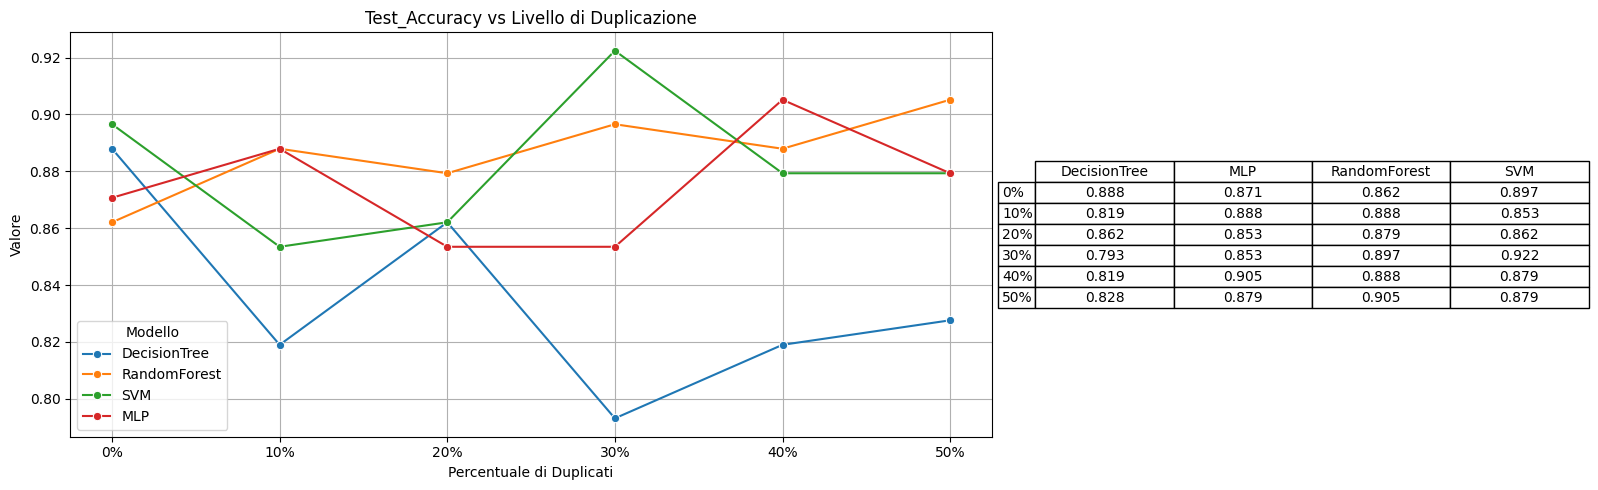

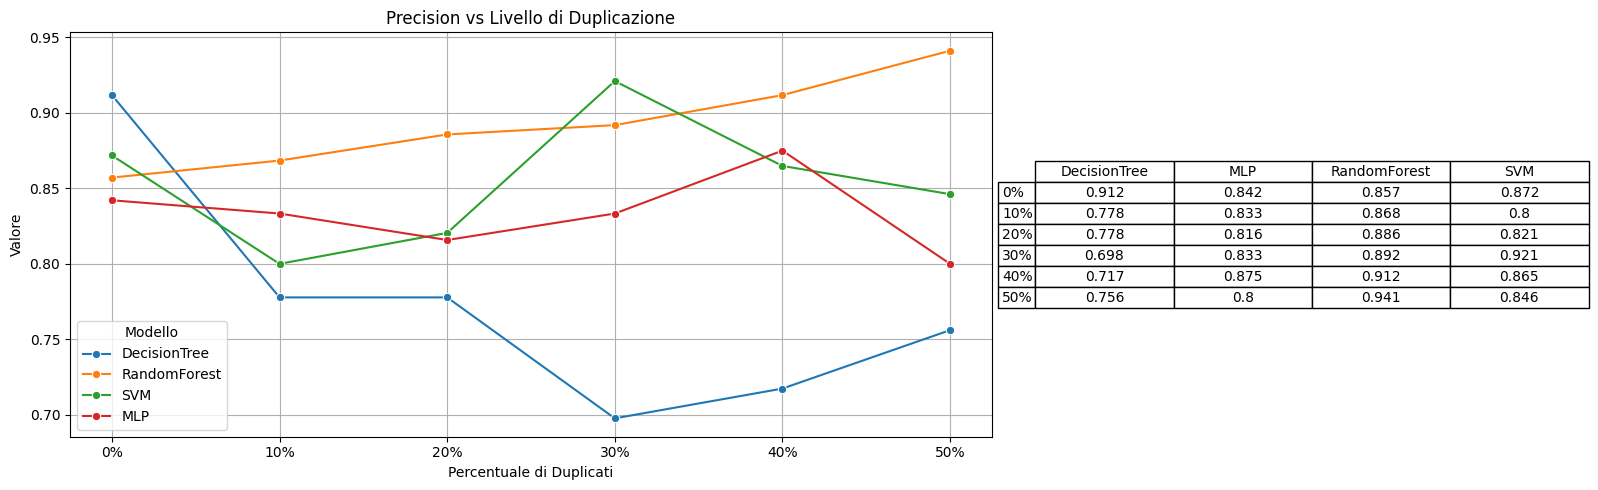

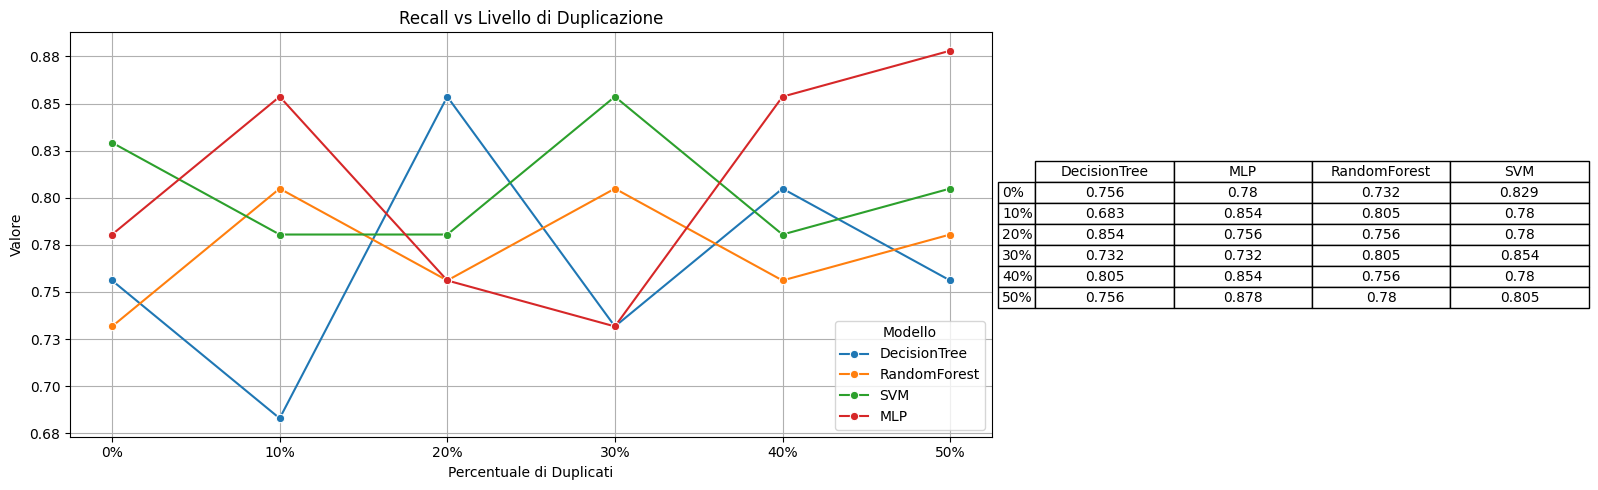

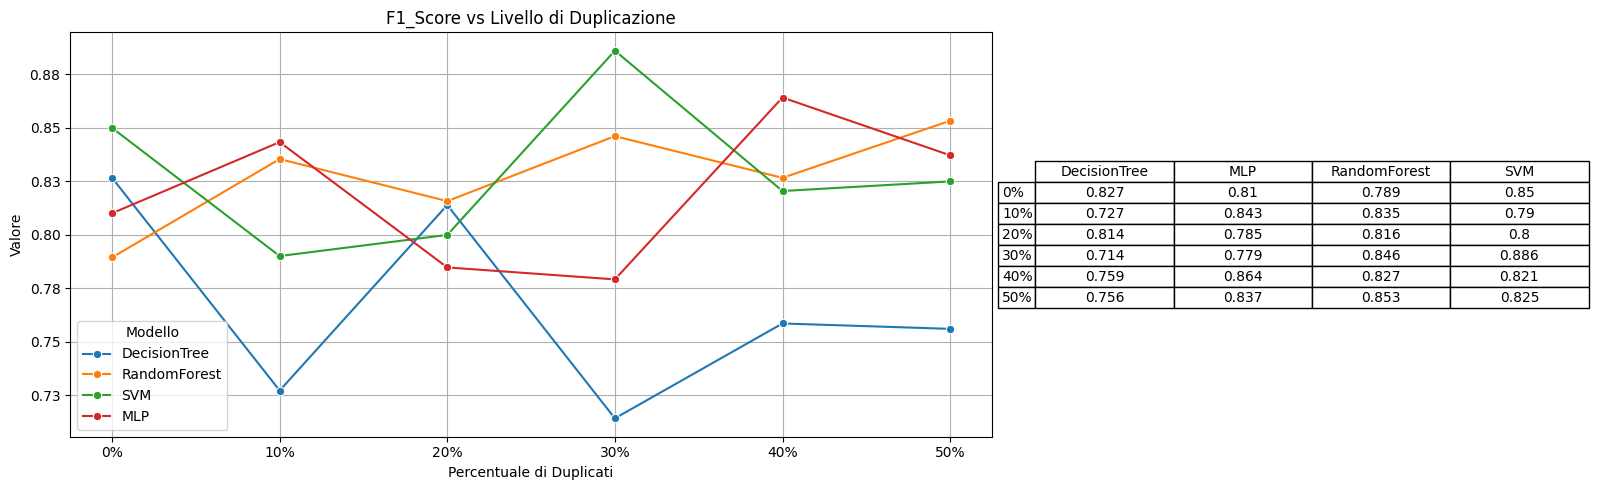

In [31]:
metriche = ["Test_Accuracy", "Precision", "Recall", "F1_Score"]

for metrica in metriche:
    # Crea la figura con 2 colonne: 1 grafico + 1 tabella
    fig, axs = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios': [2, 1]})

    # --- GRAFICO ---
    sns.lineplot(data=results_df, x="Duplication_Float", y=metrica, hue="Model", marker="o", ax=axs[0])

    axs[0].set_title(f"{metrica} vs Livello di Duplicazione")
    axs[0].set_xlabel("Percentuale di Duplicati")
    axs[0].set_ylabel("Valore")
    axs[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[0].grid(True)
    axs[0].legend(title="Modello")

    # --- TABELLA ---
    tabella = results_df.pivot(index="Duplication_Float", columns="Model", values=metrica)
    tabella = tabella.sort_index()
    tabella.index = [f"{int(p*100)}%" for p in tabella.index]
    axs[1].axis('off')
    table = axs[1].table(cellText=tabella.round(3).values,
                         rowLabels=tabella.index,
                         colLabels=tabella.columns,
                         loc='center',
                         cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()


L’analisi delle metriche di valutazione (Accuracy, Precision, Recall, F1-score) in presenza di duplicazione progressiva delle feature conferma e approfondisce quanto osservato sugli EPC: il rumore nei dati di input ha un impatto diverso rispetto agli errori nelle etichette.

- Modello più robusto: Random Forest

  - Le metriche sono coerenti e stabili lungo tutto l’esperimento:

    - Accuracy resta ≥ 0.86 fino al 30%, con picchi oltre 0.90 al 50%.

    - F1-score stabile tra 0.78–0.85, Precision sale fino a 0.94 al 50%.

    - Random Forest è anche in questo contesto il più affidabile e resiliente, mostrando benefici nel caso di duplicati moderati.

-  SVM – robusto e adattabile
  -  Le metriche si mantengono elevate:

    -  Accuracy tra 0.85 e 0.92.

    -  F1-score sempre ≥ 0.79, con picco a 0.88 al 30%.

    -  Conclusione: SVM si adatta bene ai duplicati nelle feature, anche se mostra qualche fluttuazione su precision/recall verso il 50%.

-  MLP - miglioramento evidente rispetto al label noise

    -  Le metriche, pur non eccellenti, sono consistenti:

      -  Accuracy tra 0.85 e 0.89.

      -  F1-score stabile tra 0.81 e 0.87.

      -  Precision > 0.80 nella maggior parte dei livelli di rumore.

    -  Conclusione: MLP resta sensibile, ma si comporta molto meglio con feature duplicati rispetto a quando le etichette sono rumorose.

-  Modello più instabile: Decision Tree
  - Tutte le metriche oscillano fortemente:

      - Accuracy crolla al 30% (0.79), recupera leggermente solo dopo.

      - Precision scende sotto 0.70 a metà esperimento.

      - Recall e F1-score mostrano fluttuazioni vistose, con gap > 10 punti.

  - Conclusione: come già osservato, Decision Tree è molto vulnerabile a qualsiasi forma di rumore, in particolare nei dati in input.

---
 ---


Questo blocco del codice crea confronti dettagliati delle metriche per singolo modello.

Quindi, per ogni modello:
 - Il primo grafico mostra tutte le metriche in un unico lineplot, facilitando la comparazione interna tra Accuracy, Precision, Recall e F1-score.

 - Il secondo grafico è un barplot raggruppato, che mostra i valori di ciascuna metrica per ogni livello di duplicazione.

Perché è utile:

 - Aiuta a osservare quale metrica cala più velocemente per ciascun modello, evidenziando punti di debolezza in presenza di dati ridondanti.

 - Chiarisce l’andamento complessivo delle prestazioni a fronte di un aumento della duplicazione delle istanze nel training set, mostrando l’impatto della ridondanza sull’apprendimento.



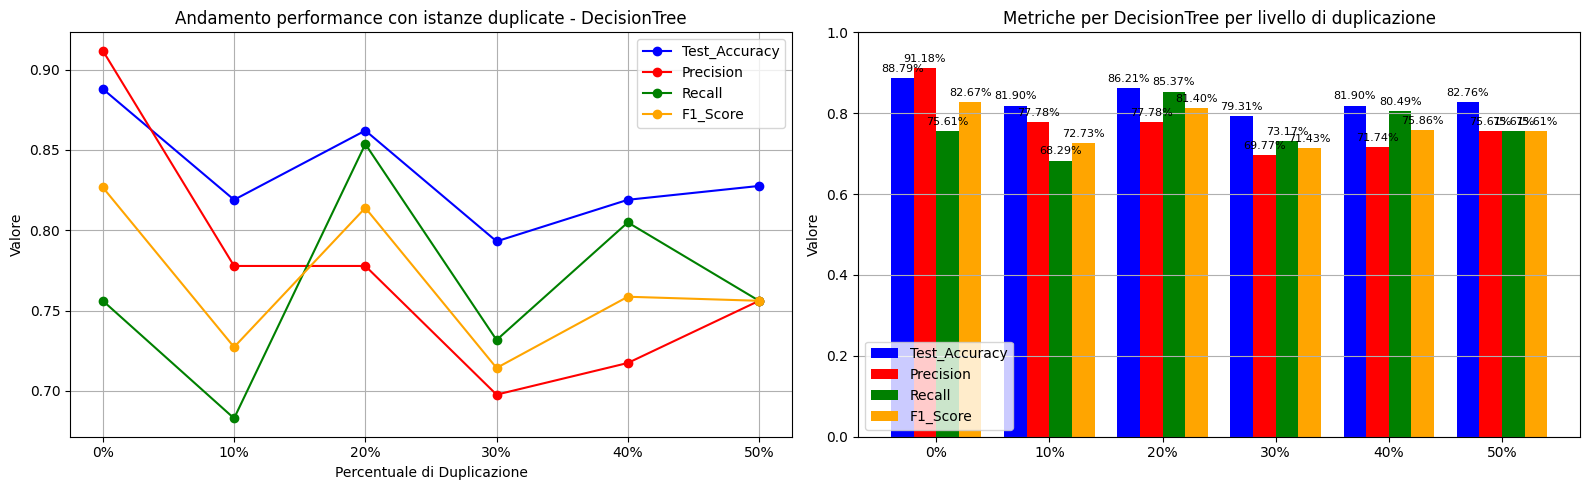

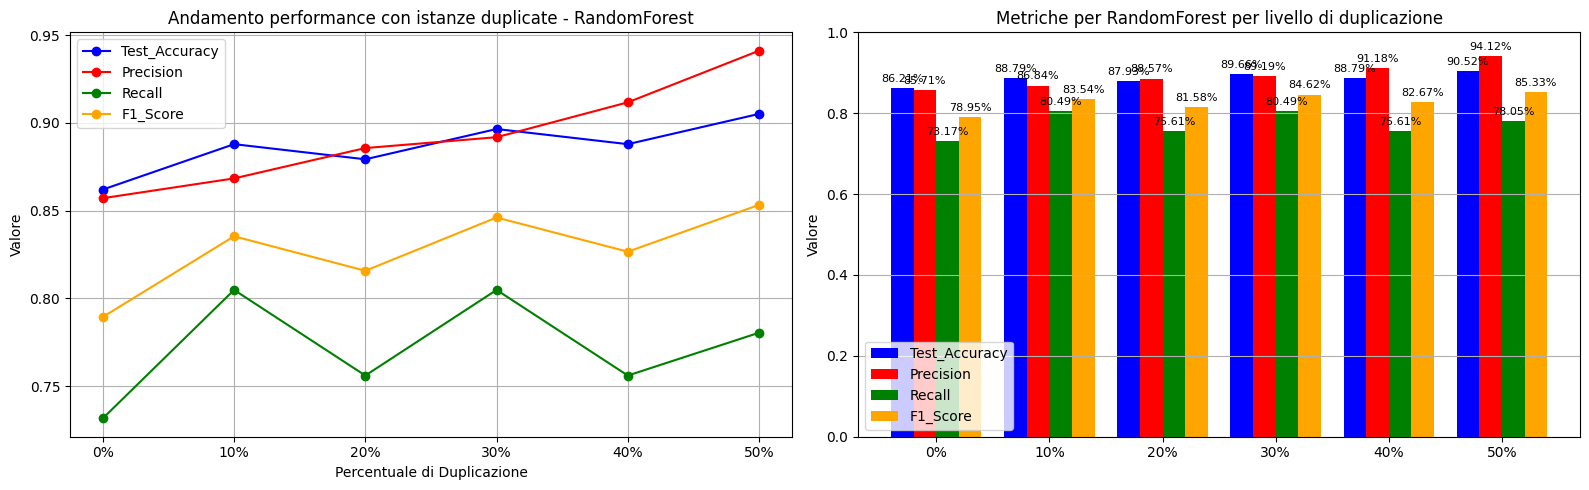

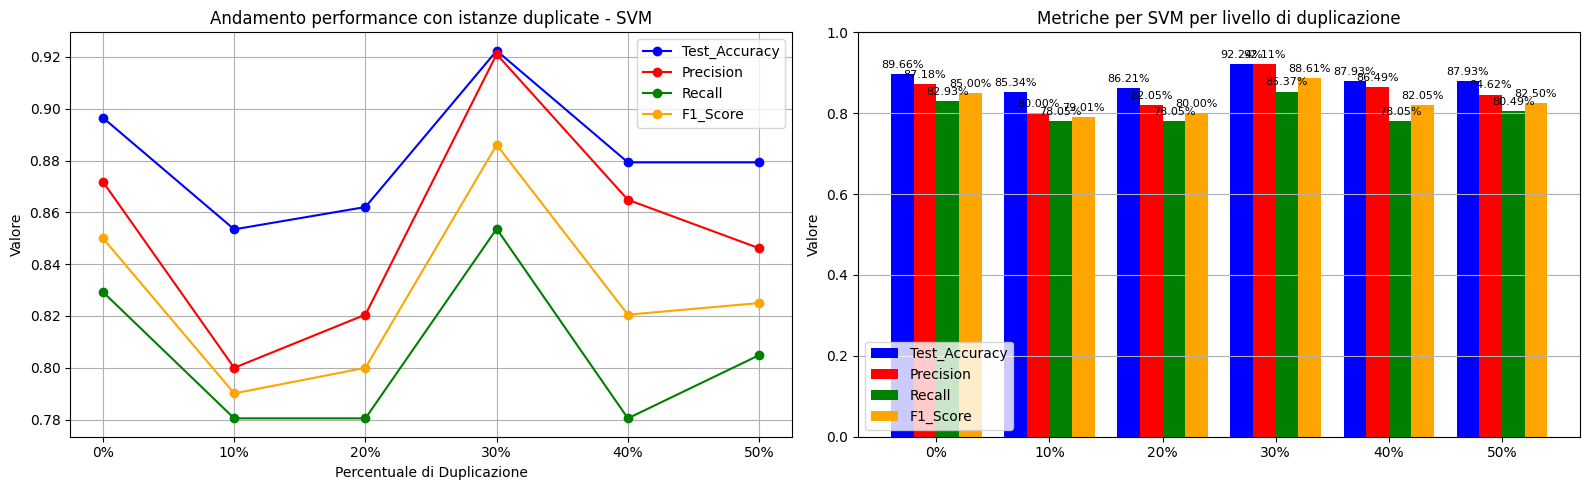

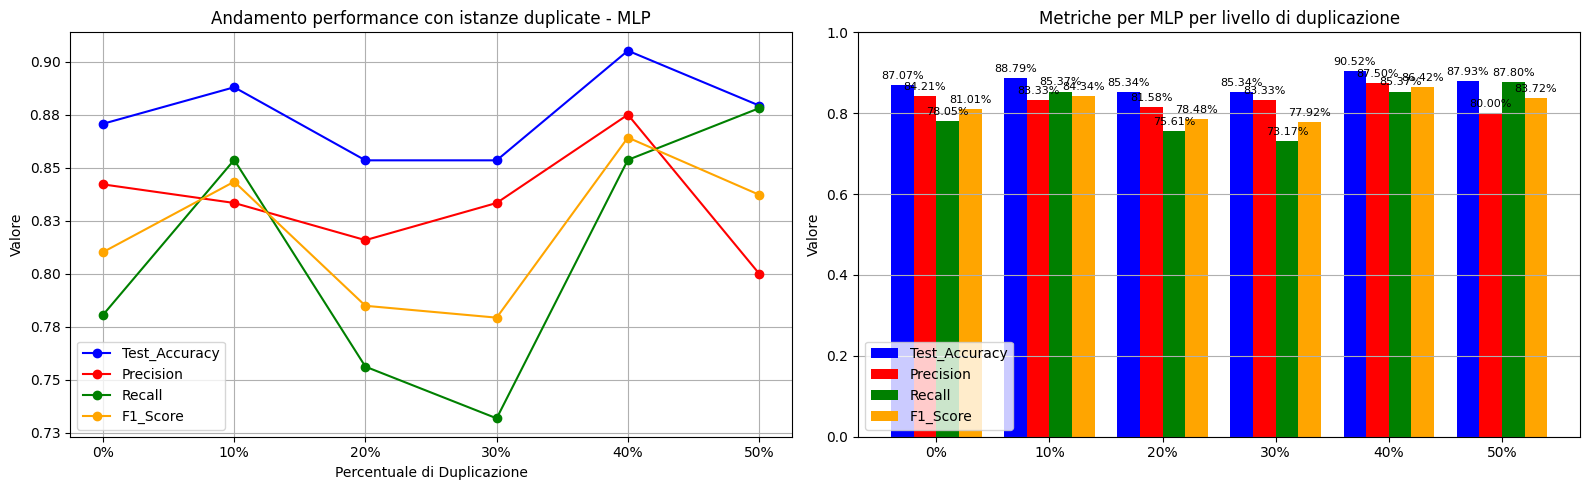

In [32]:
# Palette colori coerente
colori_metriche = {
    "Test_Accuracy": "blue",
    "Precision": "red",
    "Recall": "green",
    "F1_Score": "orange"
}

metriche = list(colori_metriche.keys())
modelli = results_df["Model"].unique()

for model in modelli:
    dati_modello = results_df[results_df["Model"] == model].sort_values(by="Duplication_Float")

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    # ------------------ LINEPLOT ------------------
    for metrica in metriche:
        x = dati_modello["Duplication_Float"]
        y = dati_modello[metrica]
        color = colori_metriche[metrica]
        axs[0].plot(x, y, label=metrica, marker="o", color=color)

    axs[0].set_title(f"Andamento performance con istanze duplicate - {model}")
    axs[0].set_xlabel("Percentuale di Duplicazione")
    axs[0].set_ylabel("Valore")
    axs[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[0].legend()
    axs[0].grid(True)

    # ------------------ BARPLOT RAGGRUPPATO ------------------
    bar_width = 0.2
    duplication_levels = dati_modello["Duplication_Float"].values
    x = np.arange(len(duplication_levels))

    for i, metrica in enumerate(metriche):
        y_vals = dati_modello[metrica].values
        axs[1].bar(x + i * bar_width, y_vals, width=bar_width, color=colori_metriche[metrica], label=metrica)

        for xi, yi in zip(x + i * bar_width, y_vals):
            axs[1].text(xi, yi + 0.015, f"{yi:.2%}", ha='center', fontsize=8)

    axs[1].set_xticks(x + bar_width * 1.5)
    axs[1].set_xticklabels([f"{int(n * 100)}%" for n in duplication_levels])
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f"Metriche per {model} per livello di duplicazione")
    axs[1].set_ylabel("Valore")
    axs[1].legend()
    axs[1].grid(True, axis='y')

    plt.tight_layout()
    plt.show()


Osservazioni sul confronto delle metriche per singolo modello:

- Random Forest – il più robusto (EPC = +0.838)
  - Prestazioni stabili e migliorative: l’Accuracy cresce da 0.862 a 0.905; anche Precision e F1-score aumentano progressivamente fino al 50%.

  - Resilienza notevole: nonostante l’introduzione di duplicati, il modello riesce a consolidare la sua capacità predittiva, probabilmente grazie alla natura randomizzata degli alberi.

  - Conclusione: modello estremamente affidabile anche in presenza di ridondanze informative.

- SVM – stabile ma meno brillante (EPC = +0.112)
  - Metriche buone e costanti: Accuracy resta tra 0.853 e 0.922, Recall stabile intorno a 0.78–0.85, ma non migliora come nel caso di RF.

  - Resiste bene: l’F1-score e la Precision non si deteriorano sensibilmente, ma l’effetto benefico del rumore è molto più contenuto.

  - Conclusione: solido anche con dati duplicati, ma non ne trae vantaggio significativo.

- MLP – migliorato rispetto ad altri esperimenti (EPC = +0.251)
  - Buona adattabilità: Accuracy e F1 oscillano leggermente ma restano elevate (Accuracy fino a 0.905, F1 > 0.80).

  - Recall e Precision fluttuano, ma senza cali drastici come avveniva col label noise.

  - Conclusione: l’MLP si mostra sorprendentemente stabile, probabilmente grazie alla ridondanza che aiuta il processo di apprendimento.

- Decision Tree – il più instabile (EPC = –0.579)
  - Prestazioni altalenanti: Accuracy scende fino a 0.793 al 30%, mentre la Precision cala nettamente (da 0.91 a 0.69), così come il F1-score.

  - Sensibilità evidente: la natura greedy del modello e la mancanza di generalizzazione lo rendono più vulnerabile alla duplicazione dei pattern.

  - Conclusione: poco adatto a dati ridondanti o duplicati, tende a sovra-adattarsi e perde precisione.

Osservazione generale:

- Rispetto al label noise, l’introduzione di feature duplicate si è rivelata meno dannosa. In alcuni casi (come per Random Forest e MLP) è risultata persino benefica, suggerendo che l’informazione ridondante può essere sfruttata positivamente da modelli flessibili o ensemble.

- Rispetto anche al feature noise, i feature duplicates hanno avuto un impatto minore sulla degradazione delle performance. Questo perché, a differenza del feature noise che altera attivamente l'informazione, la duplicazione non introduce errori ma ridondanza strutturata, che può rinforzare i pattern utili.

- Modelli flessibili o capaci di generalizzazione (come MLP, SVM e soprattutto Random Forest) mostrano una tolleranza maggiore sia al feature noise che alla duplicazione.

- Modelli più semplici e locali (come Decision Tree) risultano invece molto sensibili a entrambi i tipi di disturbo nelle feature: oscillano fortemente in presenza di duplicazioni e peggiorano con rumore casuale.



---
---

Questo blocco del codice visualizza curve ROC per ogni modello.

Piu precisamente:

- Per ogni modello, viene disegnata la curva ROC calcolata su X_test, per ogni livello di duplicazione introdotto nel training set.

- Ogni curva è accompagnata dal valore AUC corrispondente.

- La diagonale tratteggiata rappresenta il comportamento di un classificatore casuale (baseline).

Perché è utile:

- La curva ROC mostra la capacità del modello di discriminare tra classi, indipendentemente dalla soglia di decisione.

- L’AUC fornisce una metrica robusta per confrontare i modelli e capire quanto degrada la qualità della classificazione all’aumentare della duplicazione delle istanze.

          Model Duplication  \
0  DecisionTree      dup_0%   
1  RandomForest      dup_0%   
2           SVM      dup_0%   
3           MLP      dup_0%   
4  DecisionTree     dup_10%   
5  RandomForest     dup_10%   
6           SVM     dup_10%   
7           MLP     dup_10%   
8  DecisionTree     dup_20%   
9  RandomForest     dup_20%   

                                                 FPR  \
0  [0.0, 0.0, 0.04, 0.14666666666666667, 0.253333...   
1  [0.0, 0.0, 0.0, 0.02666666666666667, 0.0266666...   
2  [0.0, 0.0, 0.0, 0.013333333333333334, 0.013333...   
3  [0.0, 0.0, 0.0, 0.013333333333333334, 0.013333...   
4  [0.0, 0.02666666666666667, 0.05333333333333334...   
5  [0.0, 0.0, 0.0, 0.013333333333333334, 0.013333...   
6  [0.0, 0.0, 0.0, 0.02666666666666667, 0.0266666...   
7  [0.0, 0.0, 0.0, 0.02666666666666667, 0.0266666...   
8  [0.0, 0.0, 0.02666666666666667, 0.04, 0.066666...   
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.013333333333333334...   

                                         

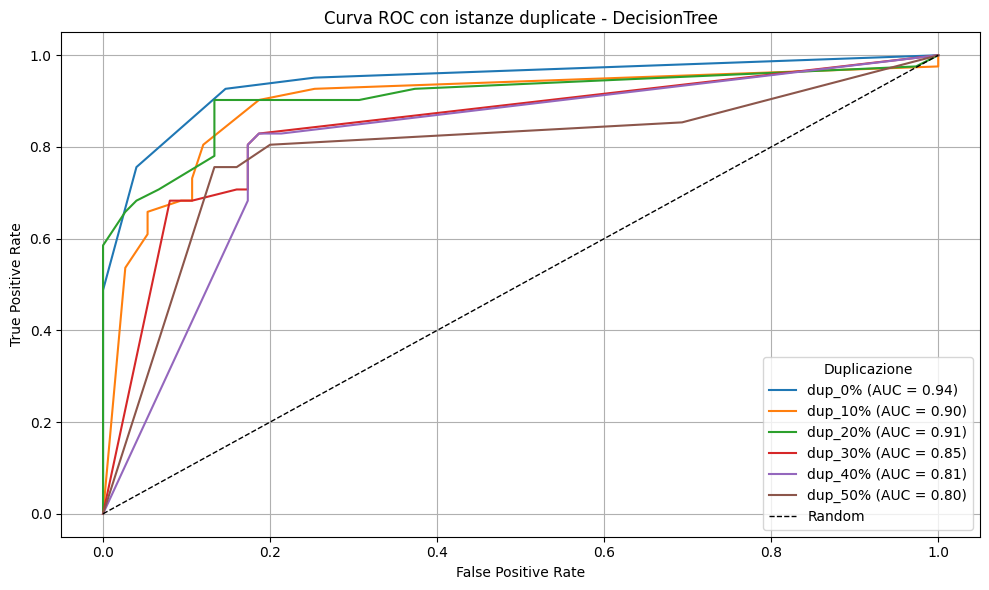

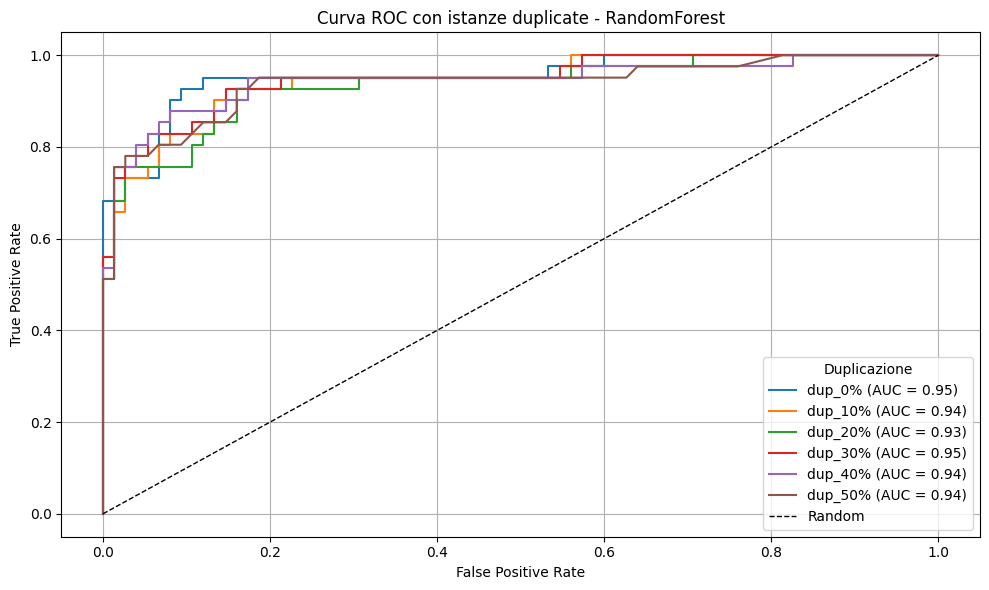

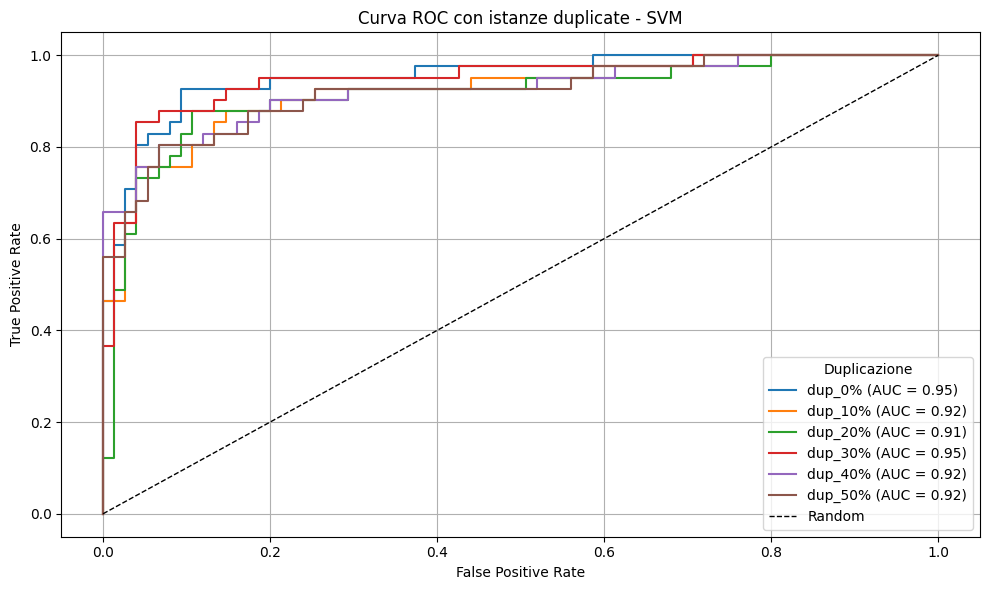

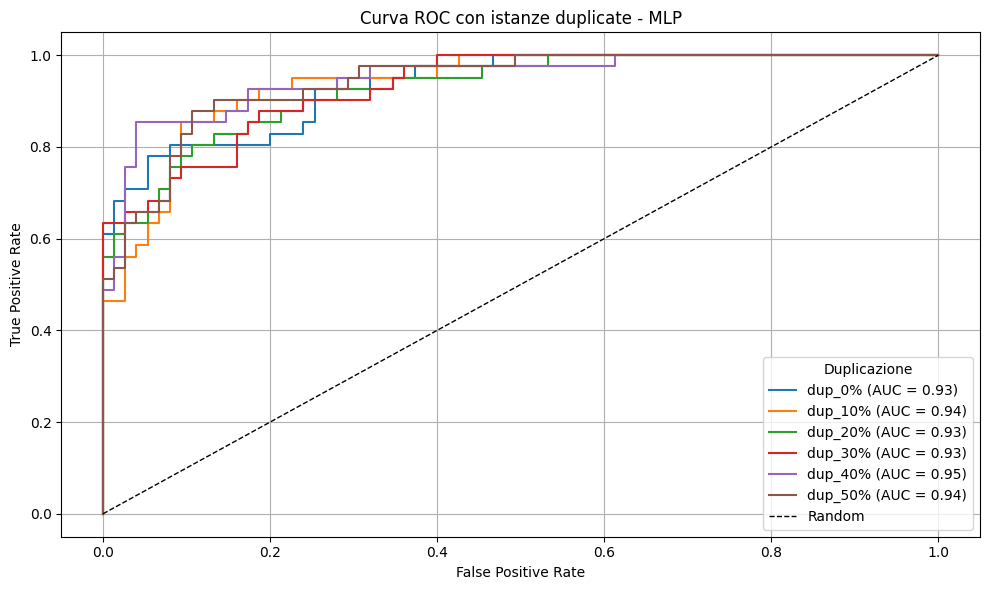

In [33]:
# Verifica se ci sono valori validi
print(results_df[["Model", "Duplication", "FPR", "TPR", "AUC"]].head(10))

# Controlla i tipi
print(results_df["FPR"].apply(type).value_counts())

modelli = results_df["Model"].unique()
duplicazioni = sorted(results_df["Duplication"].unique(), key=lambda x: int(x.split("_")[1][:-1]))

for model in modelli:
    plt.figure(figsize=(10, 6))
    dati_modello = results_df[results_df["Model"] == model]

    for dup_label in duplicazioni:
        row = dati_modello[dati_modello["Duplication"] == dup_label]
        if row.empty:
            continue

        fpr = row.iloc[0]["FPR"]
        tpr = row.iloc[0]["TPR"]
        auc = row.iloc[0]["AUC"]

        if fpr is None or tpr is None or auc is None:
            continue

        plt.plot(fpr, tpr, label=f"{dup_label} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')  # baseline
    plt.title(f"Curva ROC con istanze duplicate - {model}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(title="Duplicazione")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Conclusioni basate sulle curve ROC e AUC:

1. Random Forest – il più robusto

  - AUC sempre costante a 0.94–0.95.

  - Le curve sono stabili e ben separate dalla diagonale casuale, anche con il 50% di feature duplicate.

  - Conclusione: eccellente resilienza, zero degrado.

2. SVM – comportamento stabile ma non in crescita

  - AUC tra 0.91 e 0.95, leggera flessione attorno al 20%.

  - Le curve restano “alte” e regolari.

  - Conclusione: buone performance, ma nessun miglioramento sostanziale.

3. MLP – miglioramento costante
  - AUC resta tra 0.93 e 0.95 su tutto il range.

  - L’area migliora leggermente dopo il 30% di duplicazione.

  - Conclusione: la rete riesce a generalizzare anche con feature ridondanti.

4. Decision Tree – il più sensibile

  - AUC scende da 0.94 a 0.80 già al 30%.

  - Le curve diventano progressivamente più vicine alla diagonale.

  - Conclusione: segno di perdita di capacità discriminante, il più colpito.

---
---


## **Conclusioni finali**

L’analisi delle metriche (Accuracy, Precision, Recall, F1-score), dell’EPC e delle curve ROC/AUC evidenzia come i modelli si comportano di fronte all’introduzione progressiva di feature duplicate. In generale, questo tipo di “rumore strutturato” risulta meno dannoso rispetto a label noise o feature noise, e in alcuni casi persino vantaggioso, grazie alla ridondanza informativa che può essere sfruttata dai modelli più flessibili.

Random Forest – il più robusto
- EPC = +0.838, il valore più alto in assoluto tra tutti gli esperimenti.

- Le metriche migliorano leggermente con l’aumento delle duplicazioni.

- AUC sempre ≥ 0.94, con curve ROC molto stabili.

- La struttura a foresta aggregata sfrutta efficacemente la ridondanza per rafforzare la decisione.

**Conclusione:** modello estremamente stabile e affidabile, capace di trarre beneficio dalla duplicazione informativa.

---

SVM – stabile, ma con beneficio limitato
- EPC = +0.112 → positivo, ma contenuto.

- Le metriche restano elevate, ma non migliorano significativamente.

- AUC ~0.92–0.95 costante; il modello mostra una leggera saturazione oltre il 30%.


**Conclusione:** il modello mantiene buone prestazioni, ma non trae vantaggi reali dalla duplicazione. Adatto solo se il rumore è lieve.

---

Decision Tree – prestazioni buone ma fluttuanti
- EPC = –0.579, peggiora rispetto a feature noise e label noise.

- Le metriche oscillano fortemente e calano già al 20–30%.

- L’AUC decresce da 0.94 a 0.80, con ROC visibilmente meno pronunciate.

**Conclusione:** il modello soffre la ridondanza, che amplifica l’overfitting dovuto a split locali. Sconsigliato in presenza di feature duplicate.

---

MLP – il più penalizzato
- EPC = +0.251, migliore del valore ottenuto con label noise e simile a quello con feature noise.

- AUC stabile tra 0.93 e 0.95; le metriche migliorano dopo il 30% di duplicazione.

- Le reti neurali gestiscono bene le ridondanze grazie alla capacità di pesare e filtrare l'informazione.

**Conclusione:** il MLP è sorprendentemente robusto in presenza di feature duplicate, purché le etichette siano corrette.

Di conseguenza si deduce, che:
- Rispetto sia al label noise che al feature noise, la duplicazione delle feature ha un impatto più contenuto e in alcuni casi benefico.

- I modelli più complessi o aggregati (Random Forest, MLP) riescono a sfruttare l’informazione ripetuta per migliorare o stabilizzare la performance.

-  Al contrario, modelli più semplici e locali (Decision Tree) risultano vulnerabili all’effetto di bias introdotto da dati duplicati.